In [4]:
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt
from glob import glob

In [8]:
log_dir = 'logs/'
log_file_names = glob(log_dir + '*history.csv')
log_files = [(pd.read_csv(log_file), log_file.split('_')[0]) for log_file in log_file_names]

In [9]:
log_file_names

['logs/AlexNet_history.csv',
 'logs/GoogLeNet_history.csv',
 'logs/VGG16_history.csv',
 'logs/ResNet50_history.csv',
 'logs/ConvNext_history.csv',
 'logs/MobileNetV1_history.csv',
 'logs/ResNet34_history.csv',
 'logs/MobileNetV2_history.csv',
 'logs/LeNet5_history.csv',
 'logs/DenseNet_history.csv',
 'logs/ResNeXt_history.csv',
 'logs/Xception_history.csv']

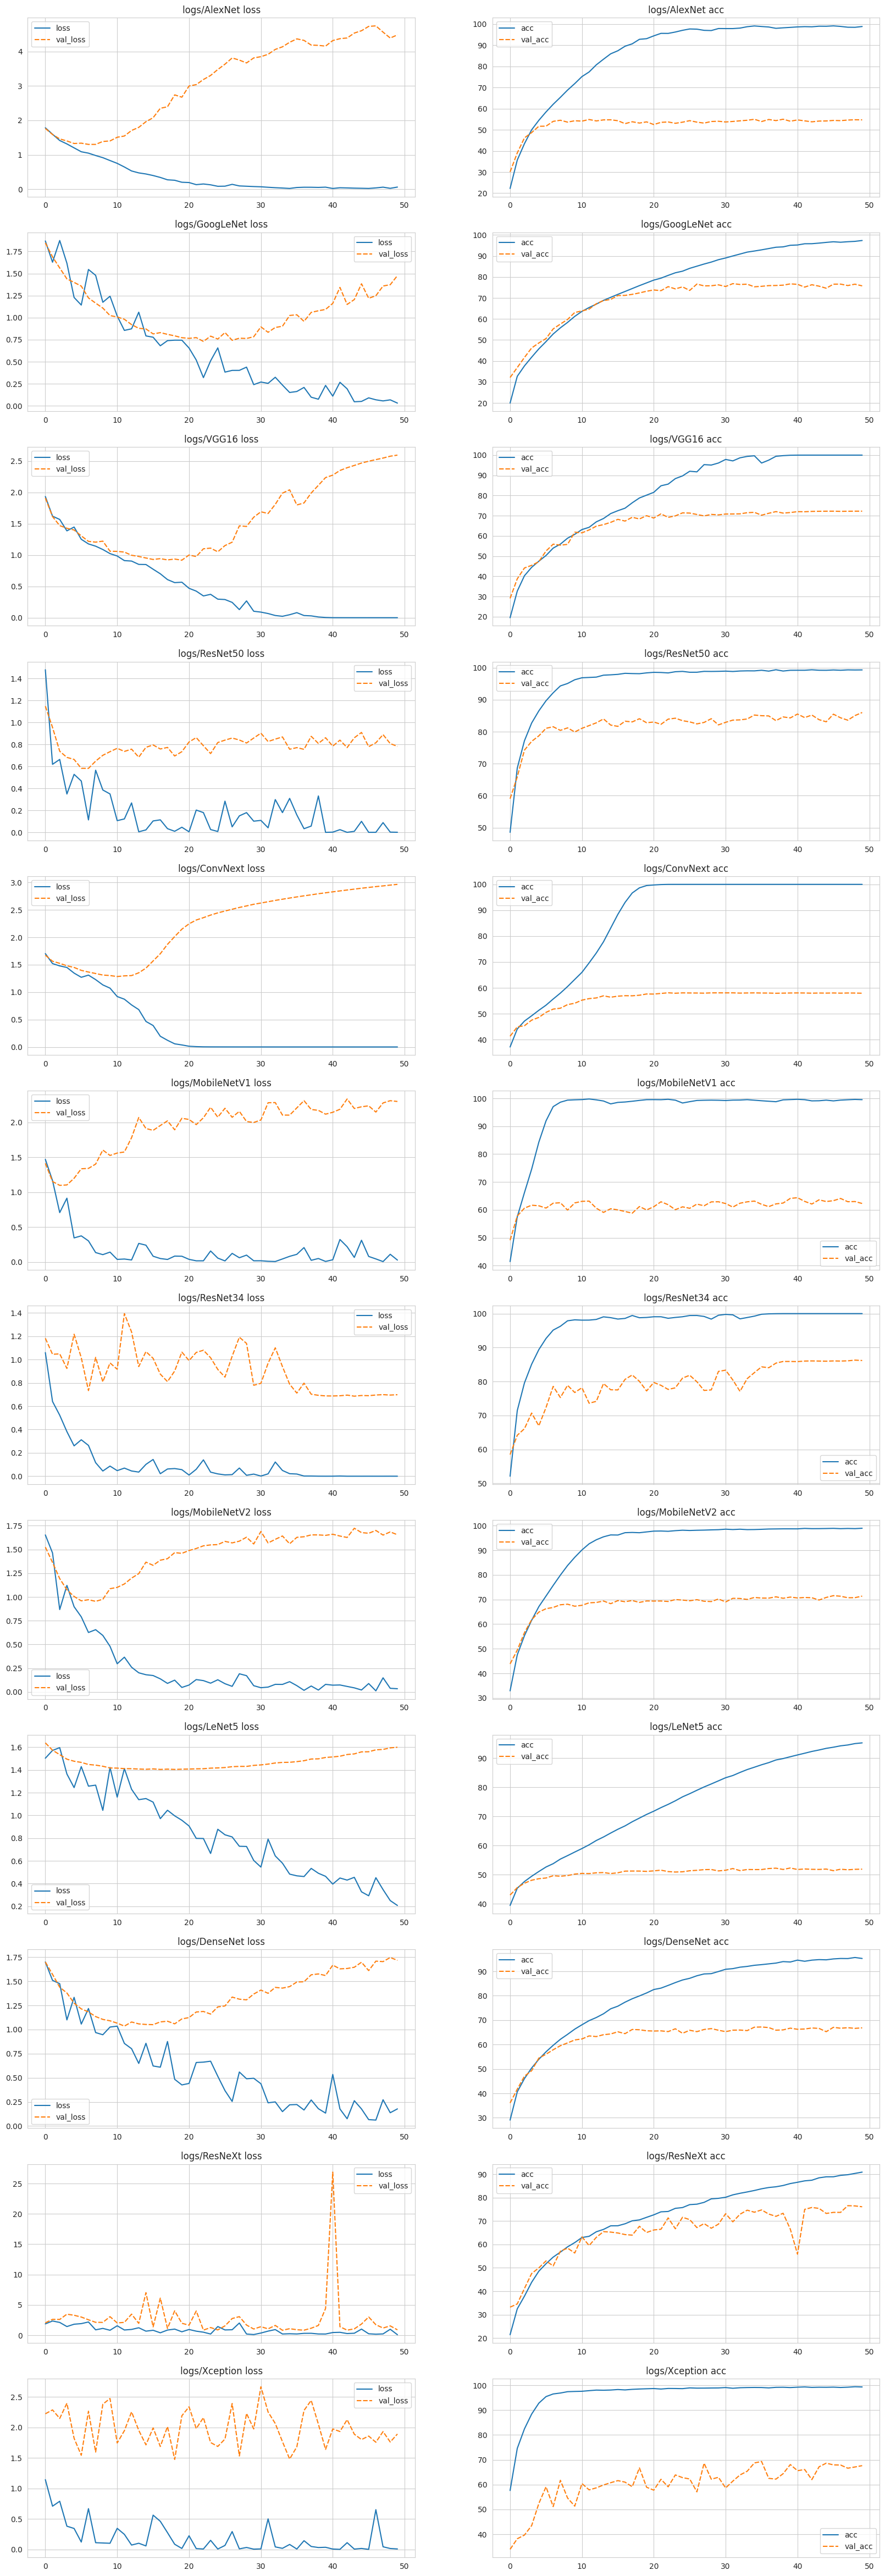

In [10]:
n_cols = 2
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(log_files), ncols=n_cols)
for (i, (log_file, log_name)) in enumerate(log_files):
    ax[i][0].set_title(log_name + ' loss')
    ax[i][1].set_title(log_name + ' acc')
    sns.lineplot([log_file['loss'], log_file['val_loss']], ax=ax[i][0])
    sns.lineplot([log_file['acc'], log_file['val_acc']], ax=ax[i][1])

Example of underfitting and then overfitting ^

# Batch size influence

In [11]:
log_file_b32 = pd.read_csv('logs/ResNet50_history_batch_reduced.csv')
log_file_b64 = pd.read_csv('logs/ResNet50_history.csv')

log_file_b32.rename(columns={column_name: column_name + '_b32' for column_name in log_file_b32.columns}, inplace=True)
log_file_b64.rename(columns={column_name: column_name + '_b64' for column_name in log_file_b64.columns}, inplace=True)

<Axes: >

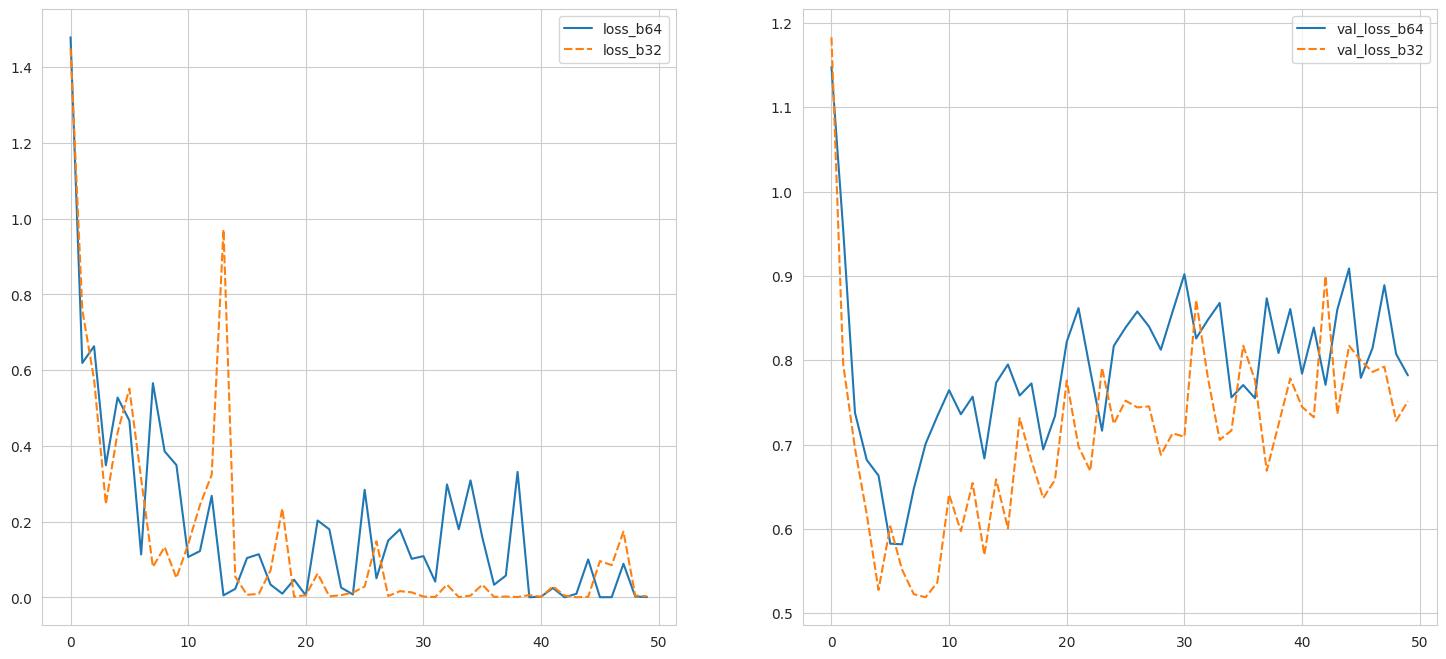

In [12]:
fig, ax = plt.subplots(figsize=(18, 8), nrows=1, ncols=2)
sns.lineplot([log_file_b64['loss_b64'], log_file_b32['loss_b32']], ax=ax[0], legend=True)
sns.lineplot([log_file_b64['val_loss_b64'], log_file_b32['val_loss_b32']], ax=ax[1])

# Early stopping, LR reduce and batch size reduction

In [16]:
log_file_names = glob(log_dir + '*early_stop.csv')
log_files = [(pd.read_csv(log_file), log_file.split('_')[0]) for log_file in log_file_names]
log_file_names

['logs/MobileNetV1_history_early_stop.csv',
 'logs/GoogLeNet_history_early_stop.csv',
 'logs/VGG16_history_early_stop.csv',
 'logs/Xception_history_early_stop.csv',
 'logs/ResNet50_history_early_stop.csv',
 'logs/ConvNext_history_early_stop.csv',
 'logs/DenseNet_history_early_stop.csv',
 'logs/ResNeXt_history_early_stop.csv',
 'logs/ResNet34_history_early_stop.csv',
 'logs/MobileNetV2_history_early_stop.csv',
 'logs/LeNet5_history_early_stop.csv',
 'logs/AlexNet_history_early_stop.csv']

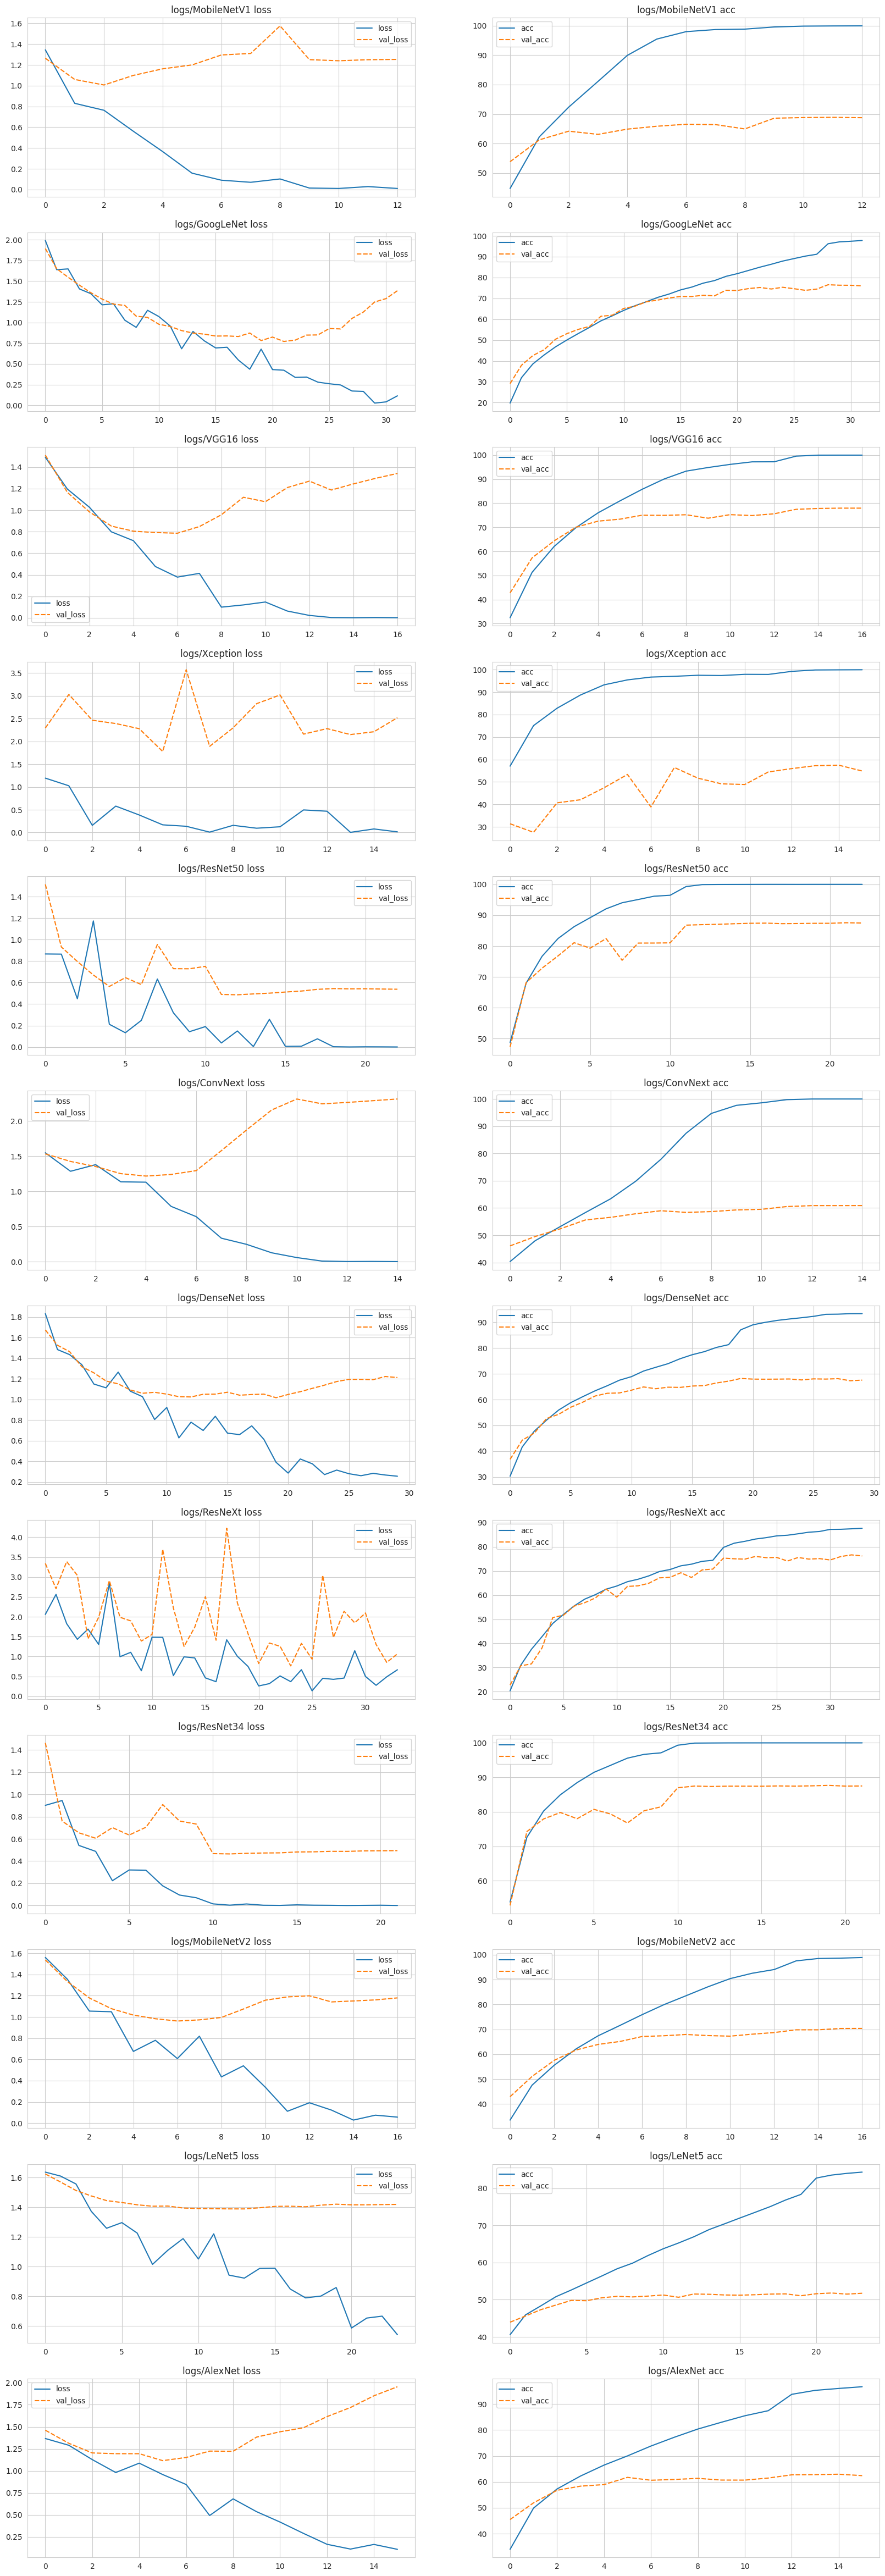

In [17]:
n_cols = 2
fig, ax = plt.subplots(figsize=(20, 60), nrows=len(log_files), ncols=n_cols)
for (i, (log_file, log_name)) in enumerate(log_files):
    ax[i][0].set_title(log_name + ' loss')
    ax[i][1].set_title(log_name + ' acc')
    sns.lineplot([log_file['loss'], log_file['val_loss']], ax=ax[i][0])
    sns.lineplot([log_file['acc'], log_file['val_acc']], ax=ax[i][1])